In [ ]:
%load_ext autoreload
import race
import math
import random

import gym
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal

from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
use_cuda = torch.cuda.is_available()
device   = torch.device("cuda" if use_cuda else "cpu")
device

In [ ]:
env = race.CurvyRace()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the deep Q-learning agent
class DQNAgent(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQNAgent, self).__init__()
        self.state_size = state_size
        self.action_size = action_size

        self.fc1 = nn.Linear(state_size, 255)
        self.fc2 = nn.Linear(255, 255)
        self.fc3 = nn.Linear(255, 255)
        self.fc4 = nn.Linear(255, 255)

        self.fc5 = nn.Linear(255, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

    def act(self, state):
        # Epsilon-greedy policy
        if np.random.rand() <= 0.1:
            return torch.tensor(np.random.uniform(low=-1, high=1, size=self.action_size), dtype=torch.float32)
        with torch.no_grad():
            state = torch.tensor(state, dtype=torch.float32)
            q_values = self(state)
            return q_values

    def replay(self, state, action, reward, next_state, done, optimizer, criterion):
        state = torch.tensor(state, dtype=torch.float32)
        action = torch.tensor(action, dtype=torch.float32)
        reward = torch.tensor(reward, dtype=torch.float32)
        next_state = torch.tensor(next_state, dtype=torch.float32)

        target = self(state).clone()
        if done:
            target[np.argmax(action)] = reward
        else:
            with torch.no_grad():
                t = self(next_state).numpy()
                target[np.argmax(action)] = reward + 0.95 * np.max(t)

        loss = criterion(self(state), target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


# Define the training parameters
state_size = 3  # observation vector dimension
action_size = 2  # action vector dimension
agent = DQNAgent(state_size, action_size)

optimizer = optim.Adam(agent.parameters(), lr=0.05)
criterion = nn.MSELoss()


# Training loop
actions = []
num_episodes = 1000
target_update_frequency = 10
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    for t in range(env.get_max_steps()):
        action = agent.act(state)
        actions.append(action)
        if episode % target_update_frequency == 0:
            next_state, reward, done = env.step(action)
            total_reward += reward
    
            agent.replay(state, action, reward, next_state, done, optimizer, criterion)
    
            if done:
                break
    
            state = next_state
        else:                   
            next_state, reward, done = env.step(action)
            total_reward += reward
            
            if done:
                break
    
            state = next_state
            
        

    if episode % 100 == 0:
        #env.plot()
        print("Episode: {}, Total Reward: {}".format(episode, total_reward))

    # Update target model weights every target_update_frequency episodes
    if episode % target_update_frequency == 0:
        agent.load_state_dict(agent.state_dict())

# Test the trained agent
state = env.reset()
done = False
while not done:
    action = agent.act(state)
    next_state, _, done = env.step(action)
    env.plot()
    state = next_state

#plt.show()


In [ ]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = []
        self.position = 0

    def push(self, state, action, next_state, reward, done):
        if len(self.buffer) < self.capacity:
            self.buffer.append(None)
        self.buffer[self.position] = (state, action, next_state, reward, done)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        state, action, next_state, reward, done = map(np.stack, zip(*batch))
        return state, action, next_state, reward, done

    def __len__(self):
        return len(self.buffer)

# Initialize replay buffer
replay_buffer = ReplayBuffer(capacity=10000)


Episode: 1, Total Reward: 11.375
Episode: 2, Total Reward: 4.125
Episode: 3, Total Reward: 11.375
Episode: 4, Total Reward: 11.375
Episode: 5, Total Reward: 4.125
Episode: 6, Total Reward: 0
Episode: 7, Total Reward: 0
Episode: 8, Total Reward: 0
Episode: 9, Total Reward: 4.125
Episode: 10, Total Reward: 4.125
Episode: 11, Total Reward: 0
Episode: 12, Total Reward: 4.125
Episode: 13, Total Reward: 0
Episode: 14, Total Reward: 4.125
Episode: 15, Total Reward: 0
Episode: 16, Total Reward: 4.125
Episode: 17, Total Reward: 11.375
Episode: 18, Total Reward: 4.125
Episode: 19, Total Reward: 0
Episode: 20, Total Reward: 4.125
Episode: 21, Total Reward: 4.125
Episode: 22, Total Reward: 0
Episode: 23, Total Reward: 4.125
Episode: 24, Total Reward: 4.125
Episode: 25, Total Reward: 4.125
Episode: 26, Total Reward: 0
Episode: 27, Total Reward: 0
Episode: 28, Total Reward: 4.125
Episode: 29, Total Reward: 4.125
Episode: 30, Total Reward: 0
Episode: 31, Total Reward: 4.125
Episode: 32, Total Reward:

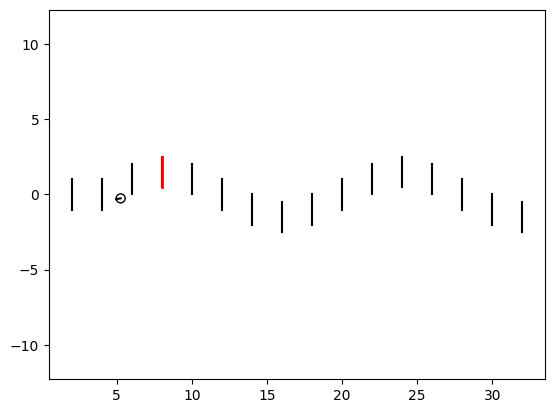

Episode: 515, Total Reward: 11.375
Episode: 516, Total Reward: 0
Episode: 517, Total Reward: 4.125
Episode: 518, Total Reward: 4.125
Episode: 519, Total Reward: 4.125
Episode: 520, Total Reward: 21.75


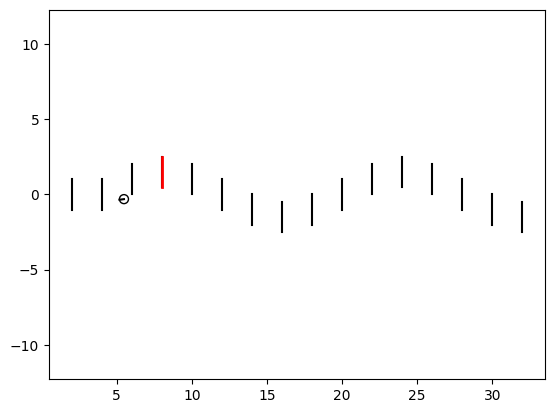

Episode: 521, Total Reward: 4.125
Episode: 522, Total Reward: 0
Episode: 523, Total Reward: 0
Episode: 524, Total Reward: 4.125
Episode: 525, Total Reward: 4.125
Episode: 526, Total Reward: 4.125
Episode: 527, Total Reward: 4.125
Episode: 528, Total Reward: 11.375
Episode: 529, Total Reward: 4.125
Episode: 530, Total Reward: 4.125
Episode: 531, Total Reward: 11.375
Episode: 532, Total Reward: 11.375
Episode: 533, Total Reward: 4.125
Episode: 534, Total Reward: 0
Episode: 535, Total Reward: 4.125
Episode: 536, Total Reward: 0
Episode: 537, Total Reward: 4.125
Episode: 538, Total Reward: 11.375
Episode: 539, Total Reward: 0
Episode: 540, Total Reward: 4.125
Episode: 541, Total Reward: 0
Episode: 542, Total Reward: 11.375
Episode: 543, Total Reward: 0
Episode: 544, Total Reward: 11.375
Episode: 545, Total Reward: 0
Episode: 546, Total Reward: 4.125
Episode: 547, Total Reward: 4.125
Episode: 548, Total Reward: 4.125
Episode: 549, Total Reward: 4.125
Episode: 550, Total Reward: 11.375
Episo

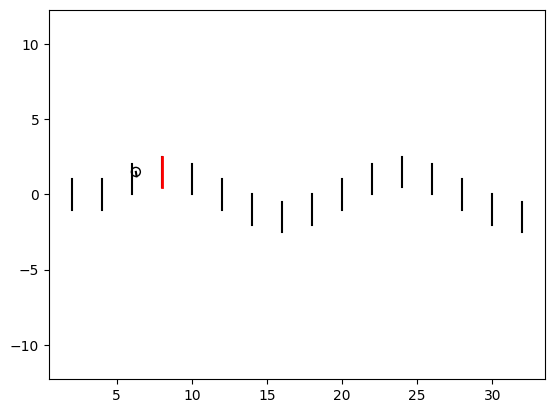

Episode: 611, Total Reward: 0
Episode: 612, Total Reward: 4.125
Episode: 613, Total Reward: 4.125
Episode: 614, Total Reward: 11.375
Episode: 615, Total Reward: 0
Episode: 616, Total Reward: 11.375
Episode: 617, Total Reward: 0
Episode: 618, Total Reward: 0
Episode: 619, Total Reward: 4.125
Episode: 620, Total Reward: 11.375
Episode: 621, Total Reward: 0
Episode: 622, Total Reward: 0
Episode: 623, Total Reward: 0
Episode: 624, Total Reward: 4.125
Episode: 625, Total Reward: 0
Episode: 626, Total Reward: 11.375
Episode: 627, Total Reward: 0
Episode: 628, Total Reward: 0
Episode: 629, Total Reward: 4.125
Episode: 630, Total Reward: 0
Episode: 631, Total Reward: 4.125
Episode: 632, Total Reward: 4.125
Episode: 633, Total Reward: 4.125
Episode: 634, Total Reward: 0
Episode: 635, Total Reward: 4.125
Episode: 636, Total Reward: 4.125
Episode: 637, Total Reward: 4.125
Episode: 638, Total Reward: 11.375
Episode: 639, Total Reward: 0
Episode: 640, Total Reward: 4.125
Episode: 641, Total Reward:

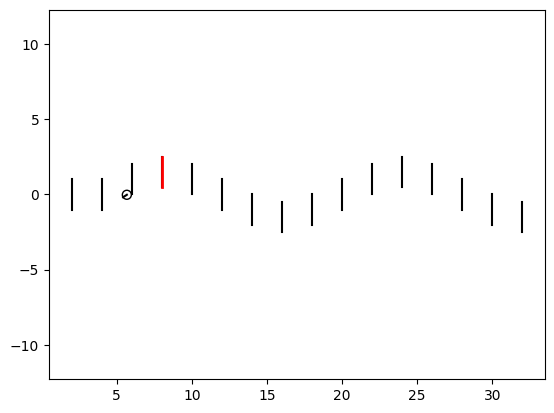

Episode: 944, Total Reward: 0
Episode: 945, Total Reward: 4.125
Episode: 946, Total Reward: 4.125
Episode: 947, Total Reward: 4.125
Episode: 948, Total Reward: 0
Episode: 949, Total Reward: 0
Episode: 950, Total Reward: 4.125
Episode: 951, Total Reward: 0
Episode: 952, Total Reward: 4.125
Episode: 953, Total Reward: 0
Episode: 954, Total Reward: 4.125
Episode: 955, Total Reward: 4.125
Episode: 956, Total Reward: 0
Episode: 957, Total Reward: 11.375
Episode: 958, Total Reward: 4.125
Episode: 959, Total Reward: 4.125
Episode: 960, Total Reward: 4.125
Episode: 961, Total Reward: 4.125
Episode: 962, Total Reward: 4.125
Episode: 963, Total Reward: 4.125
Episode: 964, Total Reward: 0
Episode: 965, Total Reward: 4.125
Episode: 966, Total Reward: 11.375
Episode: 967, Total Reward: 4.125
Episode: 968, Total Reward: 11.375
Episode: 969, Total Reward: 11.375
Episode: 970, Total Reward: 0
Episode: 971, Total Reward: 4.125
Episode: 972, Total Reward: 0
Episode: 973, Total Reward: 4.125
Episode: 974

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import gym
import math

# Define the Actor and Critic networks
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, max_action):
        super(Actor, self).__init__()
        self.layer1 = nn.Linear(state_dim, 400)
        self.layer2 = nn.Linear(400, 300)
        self.layer3 = nn.Linear(300, action_dim)
        self.max_action = max_action

    def forward(self, state):
        a = torch.relu(self.layer1(state))
        a = torch.relu(self.layer2(a))
        a = self.max_action * torch.tanh(self.layer3(a))
        return a

class Critic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Critic, self).__init__()
        self.layer1 = nn.Linear(state_dim + action_dim, 400)
        self.layer2 = nn.Linear(400, 300)
        self.layer3 = nn.Linear(300, 1)

    def forward(self, state, action):
        q = torch.relu(self.layer1(torch.cat([state, action], 1)))
        q = torch.relu(self.layer2(q))
        q = self.layer3(q)
        return q

# Define the TD3 class
class TD3:
    def __init__(self, state_dim, action_dim, max_action):
        self.actor = Actor(state_dim, action_dim, max_action)
        self.actor_target = Actor(state_dim, action_dim, max_action)
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=0.001)

        self.critic1 = Critic(state_dim, action_dim)
        self.critic1_target = Critic(state_dim, action_dim)
        self.critic1_target.load_state_dict(self.critic1.state_dict())
        self.critic1_optimizer = optim.Adam(self.critic1.parameters(), lr=0.001)

        self.critic2 = Critic(state_dim, action_dim)
        self.critic2_target = Critic(state_dim, action_dim)
        self.critic2_target.load_state_dict(self.critic2.state_dict())
        self.critic2_optimizer = optim.Adam(self.critic2.parameters(), lr=0.001)

        self.max_action = max_action

    def select_action(self, state, scale_factor=1.0):
        state = torch.FloatTensor(state.reshape(1, -1))
        action = self.actor(state).cpu().data.numpy().flatten() * scale_factor
        return action

    def train(self, replay_buffer, batch_size=64, gamma=0.99, soft_tau=0.005, policy_noise=0.2, noise_clip=0.5, policy_freq=2):
        if len(replay_buffer) < batch_size:
            return

        # Sample a batch from the replay buffer
        state, action, next_state, reward, not_done = replay_buffer.sample(batch_size)

        state = torch.FloatTensor(state)
        action = torch.FloatTensor(action)
        next_state = torch.FloatTensor(next_state)
        reward = torch.FloatTensor(reward)
        not_done = torch.FloatTensor(not_done)

        # Update Critic networks
        with torch.no_grad():
            noise = (torch.randn_like(action) * policy_noise).clamp(-noise_clip, noise_clip)
            next_action = (self.actor_target(next_state) + noise).clamp(-self.max_action, self.max_action)

            target_Q1 = self.critic1_target(next_state, next_action)
            target_Q2 = self.critic2_target(next_state, next_action)
            target_Q = torch.min(target_Q1, target_Q2)
            target_Q = reward + not_done * gamma * target_Q

        current_Q1 = self.critic1(state, action)
        current_Q2 = self.critic2(state, action)

        critic1_loss = nn.functional.mse_loss(current_Q1, target_Q)
        critic2_loss = nn.functional.mse_loss(current_Q2, target_Q)

        self.critic1_optimizer.zero_grad()
        critic1_loss.backward()
        self.critic1_optimizer.step()

        self.critic2_optimizer.zero_grad()
        critic2_loss.backward()
        self.critic2_optimizer.step()

        # Update Actor network
        if self.step % policy_freq == 0:
            actor_loss = -self.critic1(state, self.actor(state)).mean()
            self.actor_optimizer.zero_grad()
            actor_loss.backward()
            self.actor_optimizer.step()

            # Update target networks
            self.soft_update(self.actor, self.actor_target, soft_tau)
            self.soft_update(self.critic1, self.critic1_target, soft_tau)
            self.soft_update(self.critic2, self.critic2_target, soft_tau)

    def soft_update(self, model, target_model, soft_tau):
        for param, target_param in zip(model.parameters(), target_model.parameters()):
            target_param.data.copy_((1 - soft_tau) * target_param.data + soft_tau * param.data)

# Create the environment
env = race.CurvyRace()

# Set random seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# Initialize the TD3 agent
state_dim = env.get_observation_dim()
action_dim = env.get_action_dim()
max_action = float(env.get_action_limits()[0])
td3_agent = TD3(state_dim, action_dim, max_action)

# Training parameters
max_episodes = 1000
max_steps_per_episode = 100
batch_size = 64
actions=[]

# Training loop
for episode in range(max_episodes):
    state = env.reset()
    total_reward = 0

    for step in range(max_steps_per_episode):
        action = td3_agent.select_action(state, 2)
        #action = [action[0] * 5, action[1]]
        actions.append(action)
        next_state, reward, done = env.step(action)

        if reward == 1:            
            total_reward += reward + (10 * env.get_gate_idx()/len(env.get_gates())) 

        td3_agent.train(replay_buffer)  # Update the TD3 agent

        state = next_state

        if done:
            break

    print(f"Episode: {episode + 1}, Total Reward: {total_reward}")
    if total_reward > 20:
        env.plot()

# Test the trained agent
state = env.reset()
done = False
while not done:
    action = td3_agent.select_action(state)
    next_state, reward, done = env.step(action)
    #env.plot()

#plt.show()
